## IMPORT LIBRARIES

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Read Dataset

In [84]:
sic = pd.read_csv('https://raw.githubusercontent.com/Amerta1090/SIC_machine-learning-model-to-predict-tool-wear-failures-in-a-milling-machine-based-on-sensor-data/main/ai4i2020.csv')

In [85]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [86]:
sic.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9712,9713,M24572,M,299.1,310.2,1456,48.4,101,0,0,0,0,0,0
9620,9621,L56800,L,298.9,310.0,1470,45.9,109,0,0,0,0,0,0
5407,5408,L52587,L,302.7,312.4,1954,24.8,13,0,0,0,0,0,0
5970,5971,L53150,L,300.4,310.8,1520,37.6,151,0,0,0,0,0,0
8005,8006,L55185,L,300.8,312.0,1477,37.3,164,0,0,0,0,0,0
7631,7632,L54811,L,300.5,311.6,1444,49.3,92,0,0,0,0,0,0
5510,5511,L52690,L,302.8,312.1,1418,51.4,54,0,0,0,0,0,0
2473,2474,M17333,M,298.9,308.5,1555,37.6,142,0,0,0,0,0,0
8935,8936,L56115,L,297.4,308.3,1801,26.9,11,0,0,0,0,0,0
5210,5211,L52390,L,303.7,312.6,1466,42.5,183,0,0,0,0,0,0


In [87]:
for col in sic.columns:
  unique_values = sic[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'UDI': [    1     2     3 ...  9998  9999 10000]
Unique values for column 'Product ID': ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Unique values for column 'Type': ['M' 'L' 'H']
Unique values for column 'Air temperature [K]': [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]
Unique values for column 'Process temperature [K]': [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7

## Data Preprocessing

In [88]:
sic.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [89]:
sic.duplicated().sum()

0

In [90]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [91]:
sic = sic.drop('Product ID', axis=1)

In [92]:
mapping = {
    'M': 0,
    'L': 1,
    'H': 2
}

# Apply the mapping to the 'Type' column
sic['Type'] = sic['Type'].map(mapping)

# Print the updated DataFrame
print(sic)


        UDI  Type  Air temperature [K]  Process temperature [K]  \
0         1     0                298.1                    308.6   
1         2     1                298.2                    308.7   
2         3     1                298.1                    308.5   
3         4     1                298.2                    308.6   
4         5     1                298.2                    308.7   
...     ...   ...                  ...                      ...   
9995   9996     0                298.8                    308.4   
9996   9997     2                298.9                    308.4   
9997   9998     0                299.0                    308.6   
9998   9999     2                299.0                    308.7   
9999  10000     0                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         

In [93]:
sic = sic.drop('UDI', axis=1)

In [94]:
sic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 937.6 KB


In [95]:
sic.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
6341,0,300.4,309.8,1421,47.2,0,0,0,0,0,0,0
4589,1,302.8,311.1,1721,30.0,87,0,0,0,0,0,0
2215,2,299.7,309.2,1468,49.6,132,0,0,0,0,0,0
9912,1,298.6,308.9,1327,58.8,9,0,0,0,0,0,0
1835,2,297.8,307.3,1555,35.8,190,0,0,0,0,0,0
1585,1,298.2,308.3,1400,48.7,194,0,0,0,0,0,0
1976,0,298.1,307.7,1419,47.4,142,0,0,0,0,0,0
113,0,298.8,308.6,1486,41.9,92,0,0,0,0,0,0
7400,0,299.6,310.6,1633,34.2,151,0,0,0,0,0,0
6079,0,300.8,310.7,1371,44.7,205,0,0,0,0,0,0


In [96]:
numeric_columns = sic.select_dtypes(include=['int64', 'float64']).columns
outlier_columns = [col for col in numeric_columns if col not in ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

for col in outlier_columns:
  Q1 = sic[col].quantile(0.25)
  Q3 = sic[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  sic[col] = np.clip(sic[col], lower_bound, upper_bound)

sic.describe()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.80060,300.004930,310.005560,1530.142500,39.983490,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,0.60023,2.000259,1.483734,148.798499,9.914623,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,295.300000,305.700000,1168.000000,12.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.00000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,2.00000,304.500000,313.800000,1895.500000,67.200000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## EDA

In [97]:
correlation_matrix = sic.corr()
print(correlation_matrix)

                             Type  Air temperature [K]  \
Type                     1.000000            -0.017599   
Air temperature [K]     -0.017599             1.000000   
Process temperature [K] -0.013444             0.876107   
Rotational speed [rpm]   0.003413             0.021305   
Torque [Nm]             -0.003943            -0.013861   
Tool wear [min]          0.003930             0.013853   
Machine failure          0.005152             0.082556   
TWF                      0.005349             0.009955   
HDF                     -0.000108             0.137831   
PWF                     -0.012121             0.003470   
OSF                      0.021211             0.001988   
RNF                      0.022147             0.017688   

                         Process temperature [K]  Rotational speed [rpm]  \
Type                                   -0.013444                0.003413   
Air temperature [K]                     0.876107                0.021305   
Process temperatu

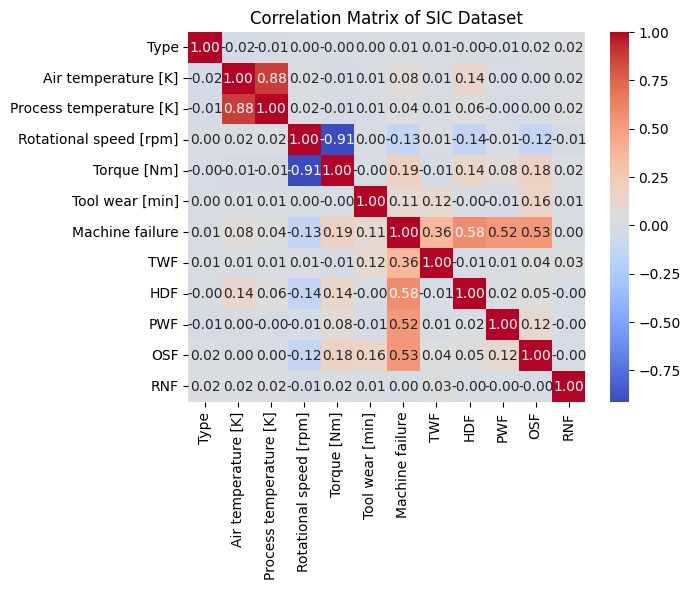

In [98]:
correlation_matrix = sic.corr()

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title to the heatmap
plt.title("Correlation Matrix of SIC Dataset")

# Show the heatmap
plt.show()


In [99]:
threshold = 0.5

# Select columns with absolute correlation values below the threshold
low_correlation_columns = [col for col in sic.columns if abs(sic[col].corr(sic['Machine failure'])) < threshold]

# Drop the low correlation columns
sic = sic.drop(low_correlation_columns, axis=1)

# Print the updated DataFrame
print(sic)


      Machine failure  HDF  PWF  OSF
0                   0    0    0    0
1                   0    0    0    0
2                   0    0    0    0
3                   0    0    0    0
4                   0    0    0    0
...               ...  ...  ...  ...
9995                0    0    0    0
9996                0    0    0    0
9997                0    0    0    0
9998                0    0    0    0
9999                0    0    0    0

[10000 rows x 4 columns]


In [100]:
for col in sic.columns:
    unique_values = sic[col].unique()
    print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'Machine failure': [0 1]
Unique values for column 'HDF': [0 1]
Unique values for column 'PWF': [0 1]
Unique values for column 'OSF': [0 1]


## MODELING

In [101]:
X = sic.drop('Machine failure', axis=1)
y = sic['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
models = [
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {accuracy:.2f}")



RandomForestClassifier: 0.99
LogisticRegression: 0.99
KNeighborsClassifier: 0.99
DecisionTreeClassifier: 0.99
SVC: 0.99
GaussianNB: 0.99
GradientBoostingClassifier: 0.99
XGBClassifier: 0.99


In [103]:
model_accuracies = {}
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model.__class__.__name__] = accuracy

# Find the model with the highest accuracy
best_model = max(model_accuracies, key=model_accuracies.get)

# Print the best model
print(f"Best model: {best_model}")


Best model: RandomForestClassifier


In [104]:
best_model = RandomForestClassifier()
best_model.fit(X, y)

# Print the trained model
print(best_model)


RandomForestClassifier()


## Evaluasi

In [105]:
y_pred = best_model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Get the classification report
cr = classification_report(y_test, y_pred)

# Print the classification report
print(cr)


[[1939    0]
 [  12   49]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1939
           1       1.00      0.80      0.89        61

    accuracy                           0.99      2000
   macro avg       1.00      0.90      0.94      2000
weighted avg       0.99      0.99      0.99      2000



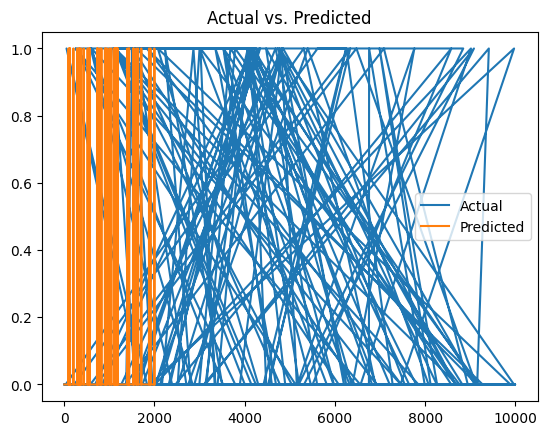

Mean absolute error: 0.01
Mean squared error: 0.01
Root mean squared error: 0.08
Good fit


In [107]:
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

# Add a legend and title
plt.legend()
plt.title('Actual vs. Predicted')

# Show the plot
plt.show()

# Calculate the mean absolute error
mae = np.mean(np.abs(y_test - y_pred))

# Calculate the mean squared error
mse = np.mean((y_test - y_pred)**2)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean absolute error: {mae:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"Root mean squared error: {rmse:.2f}")

# Check for underfitting, good fit, or overfitting
if mae > 0.5 and mse > 0.25 and rmse > 0.5:
  print("Underfitting")
elif mae < 0.5 and mse < 0.25 and rmse < 0.5:
  print("Good fit")
else:
  print("Overfitting")


In [110]:
importances = best_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the DataFrame
print(feature_importances)


  Feature  Importance
0     HDF    0.380319
2     OSF    0.311347
1     PWF    0.308334


In [109]:
def predict_machine_failure():
  input1 = float(input("Enter the first input: "))
  input2 = float(input("Enter the second input: "))
  input3 = float(input("Enter the third input: "))

  # Create a list of the user inputs
  user_input = [input1, input2, input3]

  # Convert the user input list to a NumPy array
  user_input_array = np.asarray(user_input)

  # Reshape the NumPy array to a single instance with multiple features
  user_input_reshaped = user_input_array.reshape(1, -1)

  # Make a prediction using the best model
  prediction = best_model.predict(user_input_reshaped)

  if prediction == 1:
    print("Machine failure kemungkinan akan terjadi.")
  else:
    print("Machine failure kemungkinan tidak akan terjadi.")

# Call the function to make a prediction
predict_machine_failure()


Enter the first input: 0
Enter the second input: 0
Enter the third input: 0
Machine failure kemungkinan tidak akan terjadi.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
